In [1]:
# Import TensorFlow
import tensorflow as tf



C:\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Define a and b as placeholders
a = tf.placeholder(dtype=tf.int8)
b = tf.placeholder(dtype=tf.int8)

# Define the addition
c = tf.add(a, b)

# Initialize the graph
graph = tf.Session()

# Run the graph
#graph.run(c, feed_dict={a: 5, b: 4})
graph.run(c, feed_dict={a:50, b: -4})

46

Using TensorFlow backend.


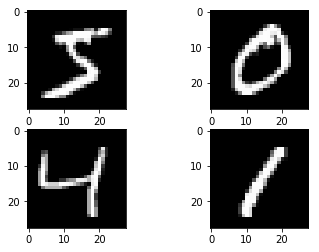

In [3]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [5]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [6]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [8]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [12]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2782 - acc: 0.9211 - val_loss: 0.1413 - val_acc: 0.9573
Epoch 2/10
 - 6s - loss: 0.1117 - acc: 0.9678 - val_loss: 0.0917 - val_acc: 0.9711
Epoch 3/10
 - 7s - loss: 0.0720 - acc: 0.9796 - val_loss: 0.0786 - val_acc: 0.9774
Epoch 4/10
 - 6s - loss: 0.0506 - acc: 0.9857 - val_loss: 0.0739 - val_acc: 0.9767
Epoch 5/10
 - 6s - loss: 0.0376 - acc: 0.9891 - val_loss: 0.0670 - val_acc: 0.9792
Epoch 6/10
 - 7s - loss: 0.0271 - acc: 0.9926 - val_loss: 0.0634 - val_acc: 0.9806
Epoch 7/10
 - 7s - loss: 0.0209 - acc: 0.9948 - val_loss: 0.0617 - val_acc: 0.9811
Epoch 8/10
 - 6s - loss: 0.0142 - acc: 0.9969 - val_loss: 0.0626 - val_acc: 0.9805
Epoch 9/10
 - 6s - loss: 0.0109 - acc: 0.9978 - val_loss: 0.0581 - val_acc: 0.9807
Epoch 10/10
 - 7s - loss: 0.0082 - acc: 0.9985 - val_loss: 0.0601 - val_acc: 0.9811
Baseline Error: 1.89%


# CNN

In [32]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

C:\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [33]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [34]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [35]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [36]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [37]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 125s - loss: 0.2333 - acc: 0.9342 - val_loss: 0.0819 - val_acc: 0.9743
Epoch 2/10
 - 120s - loss: 0.0739 - acc: 0.9781 - val_loss: 0.0467 - val_acc: 0.9841
Epoch 3/10
 - 119s - loss: 0.0536 - acc: 0.9837 - val_loss: 0.0431 - val_acc: 0.9857
Epoch 4/10
 - 116s - loss: 0.0405 - acc: 0.9877 - val_loss: 0.0407 - val_acc: 0.9869
Epoch 5/10
 - 121s - loss: 0.0340 - acc: 0.9892 - val_loss: 0.0341 - val_acc: 0.9874
Epoch 6/10
 - 117s - loss: 0.0278 - acc: 0.9914 - val_loss: 0.0313 - val_acc: 0.9896
Epoch 7/10
 - 117s - loss: 0.0234 - acc: 0.9929 - val_loss: 0.0341 - val_acc: 0.9886
Epoch 8/10
 - 117s - loss: 0.0206 - acc: 0.9938 - val_loss: 0.0327 - val_acc: 0.9882
Epoch 9/10
 - 118s - loss: 0.0170 - acc: 0.9942 - val_loss: 0.0305 - val_acc: 0.9896
Epoch 10/10
 - 116s - loss: 0.0146 - acc: 0.9957 - val_loss: 0.0311 - val_acc: 0.9908
CNN Error: 0.92%


# Larger Convolutional Neural Network for MNIST

In [9]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [10]:
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [42]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 139s 2ms/step - loss: 0.3795 - acc: 0.8842 - val_loss: 0.0902 - val_acc: 0.9722
Epoch 2/100
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1054 - acc: 0.9678 - val_loss: 0.0558 - val_acc: 0.9831
Epoch 3/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0744 - acc: 0.9766 - val_loss: 0.0438 - val_acc: 0.9854
Epoch 4/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0599 - acc: 0.9815 - val_loss: 0.0387 - val_acc: 0.9866
Epoch 5/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0506 - acc: 0.9842 - val_loss: 0.0305 - val_acc: 0.9894
Epoch 6/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0462 - acc: 0.9856 - val_loss: 0.0301 - val_acc: 0.9901
Epoch 7/100
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0398 - acc: 0.9873 - val_loss: 0.

# Testing with images

In [12]:
from PIL import Image
#img = Image.open('four.png').convert('L')
import PIL.ImageOps 

img = Image.open('four.png').convert('L')
img = PIL.ImageOps.grayscale(img)
#img = PIL.ImageOps.invert(img)

img = img.resize((28,28), Image.ANTIALIAS)
img.save('28.png') 

In [13]:
from PIL import Image
jpgfile = Image.open("28.png")

In [14]:
img_pred = img

In [15]:
import matplotlib.pyplot as plt
import numpy as np

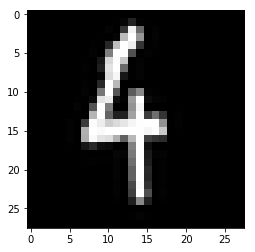

In [16]:
plt.imshow(img_pred, cmap=plt.get_cmap('gray'))
plt.show()

In [17]:
img_pred = np.array(img_pred)

In [18]:
img_pred.size

784

In [19]:
img_pred = img_pred.reshape(1,1,28,28)
pred = model.predict_classes(img_pred)

pred_proba = model.predict(img_pred)
pred_proba = pred_proba[0][pred]*100.0
print(pred[0], "with probability", pred_proba)

#pred_proba = model.predict_proba(img_pred)
#pred_proba = "%.2f%%" % (pred_proba[0][pred]*100)
#print(pred[0], "with probability", pred_proba)

4 with probability [100.]


# ************************ Find blobs and digits in it **************************

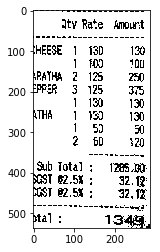

In [71]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

cv_img = cv2.imread("bill_cut.JPG",0)
#cv_img = cv2.imread("printed_24.png",0)
ret, thresh = cv2.threshold(cv_img, 150, 255, cv2.THRESH_BINARY)

plt.imshow(thresh,cmap='gray')
plt.show()

154119


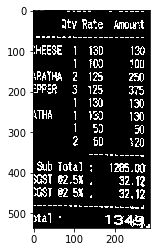

In [72]:
img = thresh
#cv2.bitwise_not
#find all your connected components (white blobs in your image)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(cv2.bitwise_not(thresh), connectivity=8)
sizes = stats[1:, -1]; nb_components = nb_components - 1


size_threshold = (img.shape[0]*img.shape[1])
print(size_threshold)
# minimum & maximum size of particles we want to keep (number of pixels)
min_size = 20 # VARIABLE 2  img.shape[0]*.05
max_size = size_threshold*0.7 # VARIABLE 3 
img2 = np.zeros((img.shape))


#for every component in the image, you keep it only if it's above min_size & less than max_size
for i in range(0, nb_components):
    if sizes[i] >= min_size and sizes[i] <= max_size:
        img2[output == i + 1] = 255

cv2.imwrite("digit_search.jpg", (img2) )
plt.imshow(img2,cmap='gray')
plt.show()

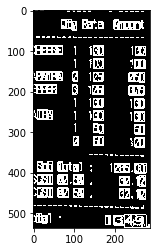

In [73]:
# find contours and get the external one
image, contours, hier = cv2.findContours(img2.astype('uint8'), cv2.RETR_TREE,
cv2.CHAIN_APPROX_SIMPLE)

digit_list = []
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    #print(x , " ", y , " ", w , " ",h)
    if (h> 10 and h<img.shape[0]*0.9) and (w> 10 and w<img.shape[1]*0.9) :  # # VARIABLE 4 
        #print(x , " ", y , " ", w , " ",h)
        # draw a rectangle to visualize 
        cv2.rectangle(img2, (x, y), (x+w, y+h),(255, 255, 255), 2)
        digit_list.append([y,y+h,x,x+w])
        

cv2.imwrite("digit_search_blobs.jpg", (img2) )
plt.imshow(img2,cmap='gray')
plt.show()

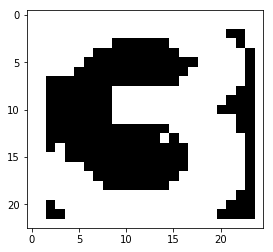

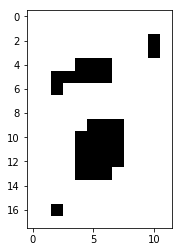

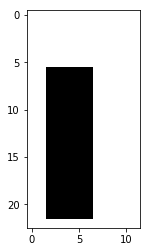

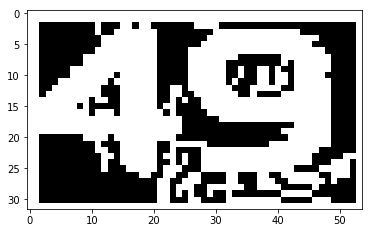

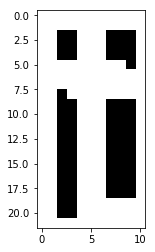

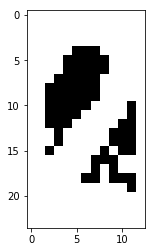

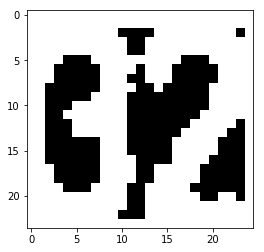

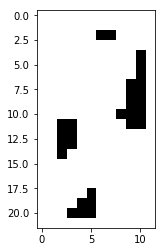

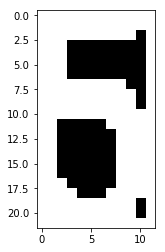

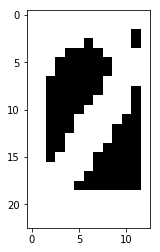

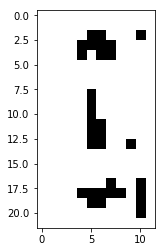

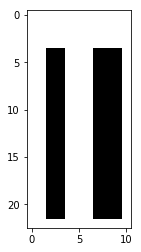

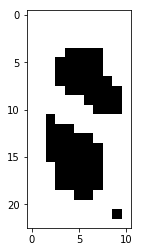

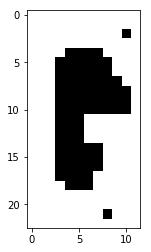

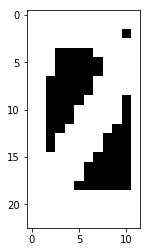

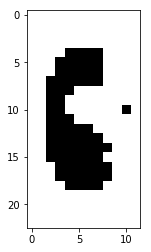

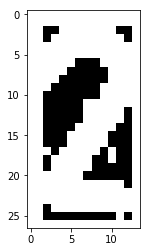

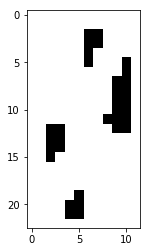

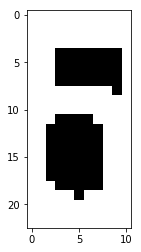

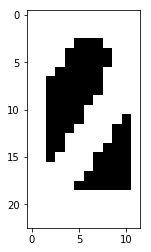

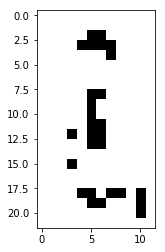

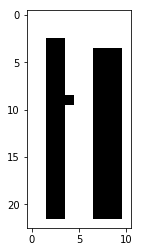

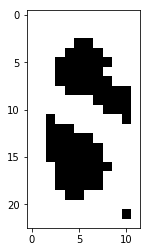

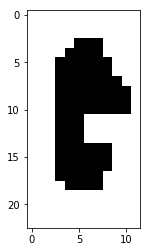

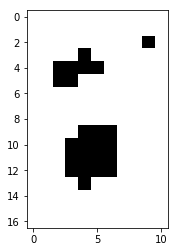

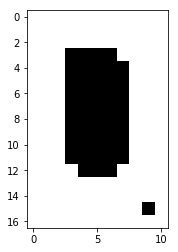

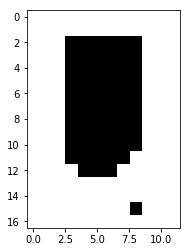

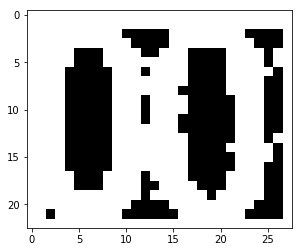

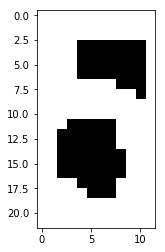

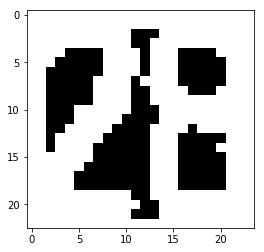

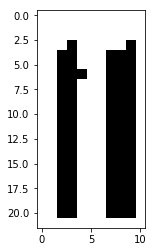

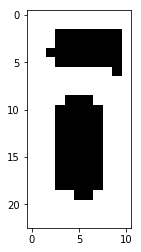

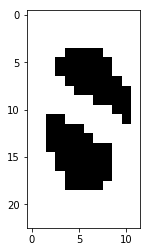

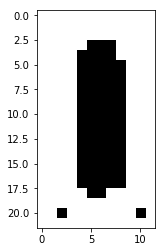

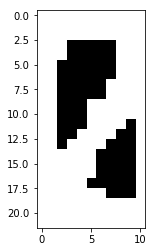

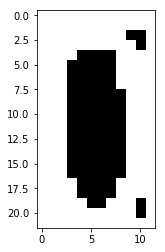

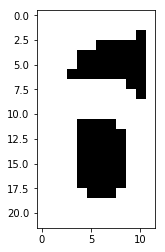

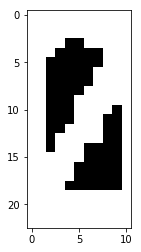

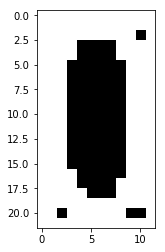

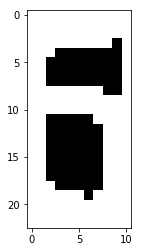

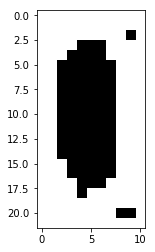

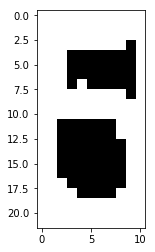

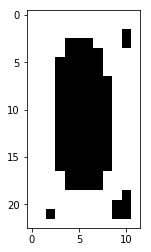

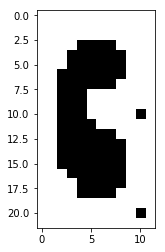

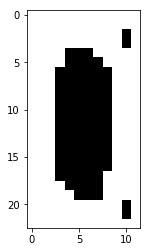

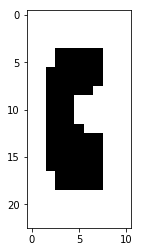

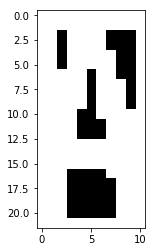

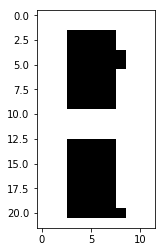

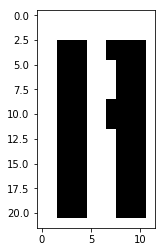

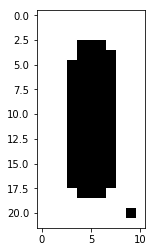

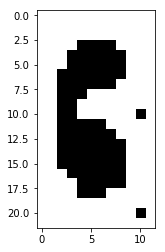

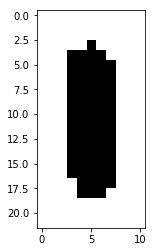

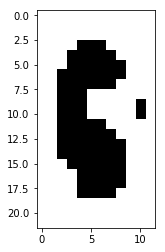

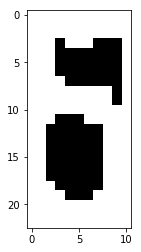

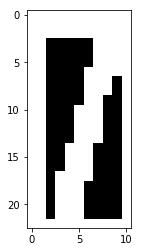

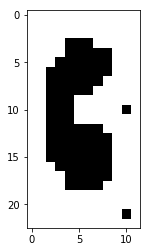

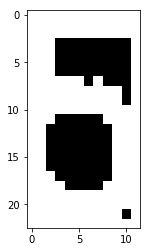

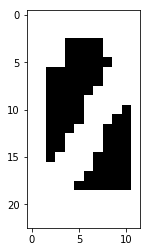

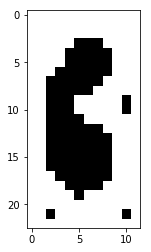

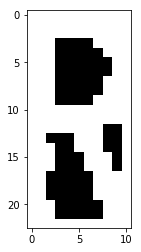

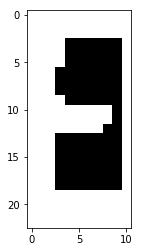

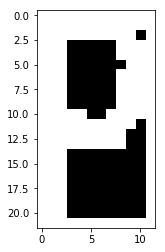

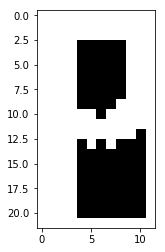

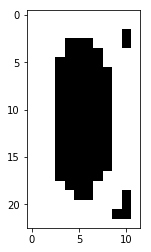

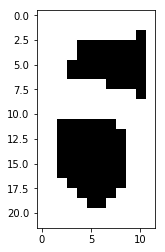

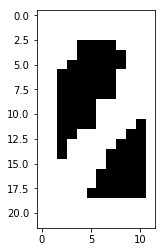

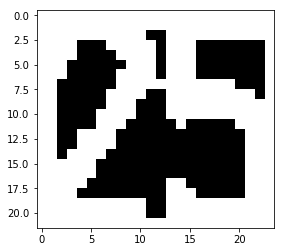

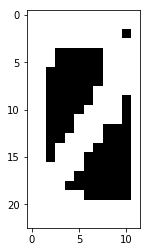

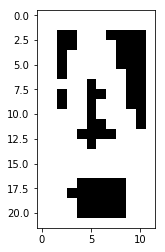

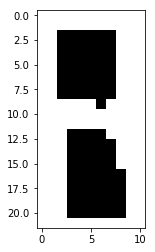

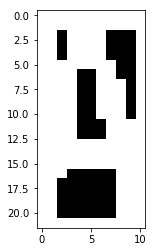

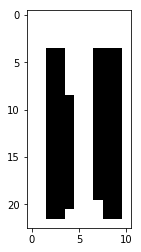

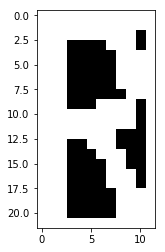

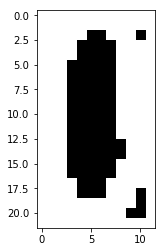

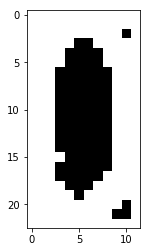

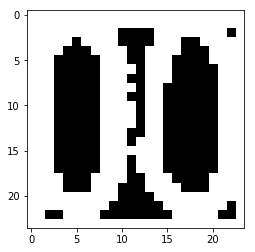

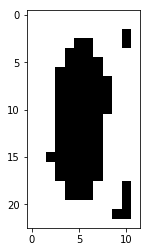

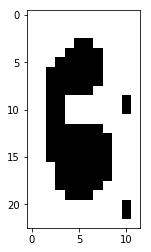

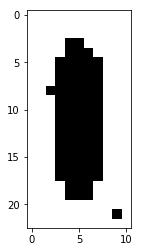

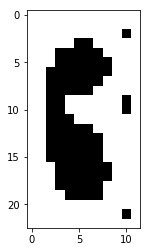

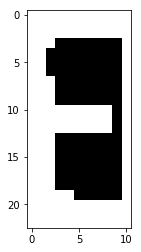

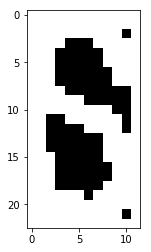

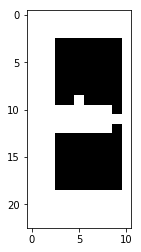

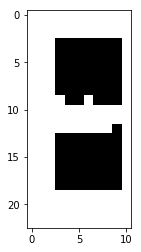

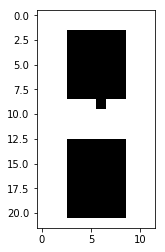

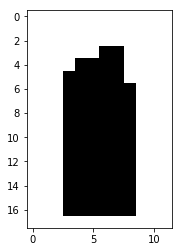

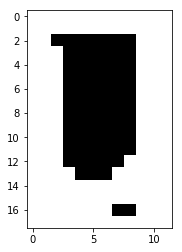

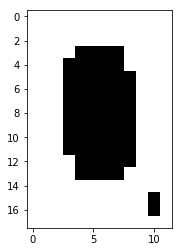

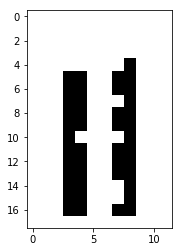

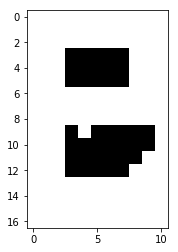

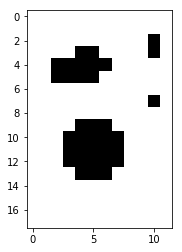

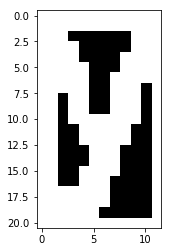

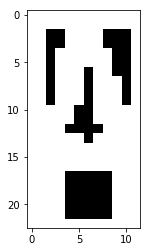

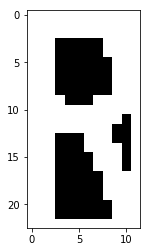

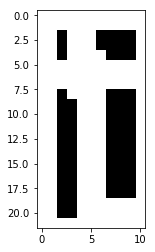

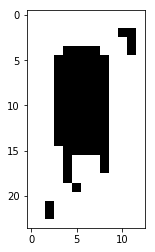

In [77]:
# to save black nd white part as probable signature
img_c = img2

for i in range (0,len(digit_list)):
    extracted_img1 = img_c[digit_list[i][0]:digit_list[i][1] ,digit_list[i][2]:digit_list[i][3]]
    cv2.imwrite("C:/Users/1311921/Desktop/#CODING/GoingDeep/temp/"+str(i)+".png",extracted_img1)
    plt.imshow(extracted_img1,cmap='gray')
    plt.show()

In [61]:
from PIL import Image

import PIL.ImageOps 

img = Image.open('0.png').convert('L')
img = PIL.ImageOps.grayscale(img)

# if backgroud is white
img = PIL.ImageOps.invert(img)
#

img = img.resize((28,28), Image.ANTIALIAS)
img_pred = np.array(img)

img_pred = img_pred.reshape(1,1,28,28)
pred = model.predict_classes(img_pred)

pred_proba = model.predict_proba(img_pred)
pred_proba = "%.2f%%" % (pred_proba[0][pred]*100)
print(pred[0], "with probability", pred_proba)

3 with probability 100.00%
